In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from textwrap import wrap

In [2]:
df = pd.read_excel('/Users/eddie/Downloads/Tab7_FOD.xlsx', skiprows = 3, index_col = 0)



print(df.columns)

Index(['Less than a Bachelor's degree ', 'Bachelor's Degree or Higher ',
       'Computer Science ', 'Engineering ', 'Civil Engineering ',
       'Electrical Engineering ', 'Mechanical Engineering ', 'Mathmatics',
       'Biology ', 'Chemistry ', 'Psychology ', 'Economics ',
       'Political Science ', 'Sociology ', 'Nursing ',
       'Other Science and Engineering Degrees2', 'General Business ',
       'Accounting ', 'Business Management and Adminstration ', 'Marketing ',
       'Finance ', 'Other Business Degrees ', 'General Education',
       'Elementary Education', 'Other Education Degrees', 'Communications ',
       'English Language and Literature ', 'Liberal Arts ', 'History ',
       'Fine Arts ', 'Commerical Art and Graphic Design ',
       'Family and Consumer Sciences ',
       'Physical Fitness, Parks, Recreation, and Leisure',
       'Criminal Justice and Fire Protection', 'Social Work ',
       'Other Degrees '],
      dtype='object')


In [3]:
df.index

Index(['Total Population age 25 to 64 with earnings1',
       'Atlanta-Sandy Springs-Alpharetta, GA ',
       'Austin-Round Rock-Georgetown, TX ', 'Baltimore-Columbia-Towson, MD ',
       'Boston-Cambridge-Newton, MA-NH ', 'Charlotte-Concord-Gastonia, NC-SC ',
       'Chicago-Naperville-Elgin, IL-IN-WI ', 'Cincinnati, OH-KY-IN ',
       'Dallas-Fort Worth-Arlington, TX ', 'Denver-Aurora-Lakewood, CO ',
       'Detroit-Warren-Dearborn, MI ', 'Houston-The Woodlands-Sugar Land, TX ',
       'Las Vegas-Henderson-Paradise, NV ',
       'Los Angeles-Long Beach-Anaheim, CA ',
       'Miami-Fort Lauderdale-Pompano Beach, FL ',
       'Minneapolis-St. Paul-Bloomington, MN-WI ',
       'New York-Newark-Jersey City, NY-NJ-PA ',
       'Orlando-Kissimmee-Sanford, FL ',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD ',
       'Phoenix-Mesa-Chandler, AZ ', 'Pittsburgh, PA ',
       'Portland-Vancouver-Hillsboro, OR-WA ',
       'Riverside-San Bernardino-Ontario, CA ',
       'Sacramento-Rosevil

In [4]:
charlotte_area = df.loc['Charlotte-Concord-Gastonia, NC-SC ']

charlotte_area

Less than a Bachelor's degree                        40430.0
Bachelor's Degree or Higher                          74000.0
Computer Science                                    105400.0
Engineering                                         100400.0
Civil Engineering                                   110800.0
Electrical Engineering                              103300.0
Mechanical Engineering                              107200.0
Mathmatics                                           87120.0
Biology                                              92730.0
Chemistry                                            83070.0
Psychology                                           64890.0
Economics                                            97030.0
Political Science                                    78640.0
Sociology                                            48970.0
Nursing                                              76700.0
Other Science and Engineering Degrees2               80960.0
General Business        

In [5]:
all_degrees = charlotte_area.loc['Computer Science ' : 'Other Degrees ']
business_degrees = charlotte_area.loc['General Business ' : 'Other Business Degrees ']

other_degrees = all_degrees.drop(business_degrees.index)

average_other_degrees = int(other_degrees.mean())

data_df = pd.concat([business_degrees, pd.Series([average_other_degrees], index=['Average Other Degrees'])], axis=0)

data_df

General Business                           86860.0
Accounting                                105400.0
Business Management and Adminstration      75530.0
Marketing                                  63970.0
Finance                                   107300.0
Other Business Degrees                     83340.0
Average Other Degrees                      72263.0
dtype: float64

/var/folders/0m/p03jcv9j4td3thddmd99m0300000gp/T/ipykernel_37229/4223756736.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:,.0f}' for x in range(60000, 110000, 10000)], size = 8, fontfamily = 'serif')


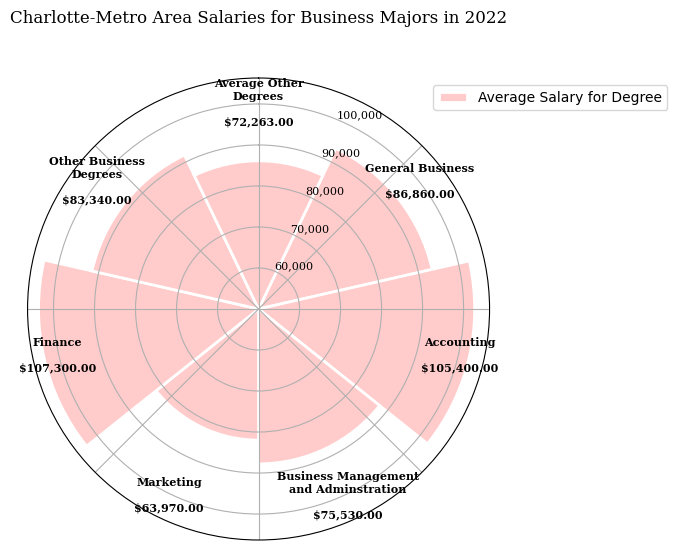

In [6]:
# Create a bar chart on a polar axis

plt.figure(figsize=(8,6))

ax = plt.subplot(111, polar=True, projection = 'polar')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_xticklabels([])
ax.set_yticklabels([f'{x:,.0f}' for x in range(60000, 110000, 10000)], size = 8, fontfamily = 'serif')

width = 2 * np.pi / len(data_df.index)
indexes = list(range(1, len(data_df.index) + 1))
angles = [element * width for element in indexes]
num_data_points = len(data_df.index)
heights = data_df



bar = ax.bar(x = angles, height=heights, width=width, color='#ffcccb', bottom = 0, linewidth=2, edgecolor='white')
wrapped_labels = ['\n'.join(wrap(label, width=20)) for label in data_df.index]

for bar, angle, height, label in zip(bar, angles, heights, wrapped_labels):
    ax.annotate(f'{label}\n\n${height:,.2f}', xy=(angle, height + 5000), xytext=(angle, 100700),
                ha='center', va='center', fontsize=8, color='black', fontfamily = 'serif', weight = 'bold')


        
plt.title('Charlotte-Metro Area Salaries for Business Majors in 2022', fontfamily = 'serif', pad = 40)
plt.legend(['Average Salary for Degree'], loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

In [56]:
# Tree map

data_series = pd.Series(
    [86860.0, 105400.0, 75530.0, 63970.0, 107300.0, 83340.0, 72263.0],
    index=[
        "General Business",
        "Accounting",
        "Business Management and Adminstration",
        "Marketing",
        "Finance",
        "Other Business Degrees",
        "Average Other Degrees",
    ],
    name="value",
)

data_df['path'] = data_df['index'] + '<br>Salary: $' + data_df['value'].astype(str)


fig = px.treemap(
    data_df,
    path=['path'],
    values='value',
    hover_data={'value': ':,.2f', 'index': True},
)

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0), autosize=True)
fig.show()

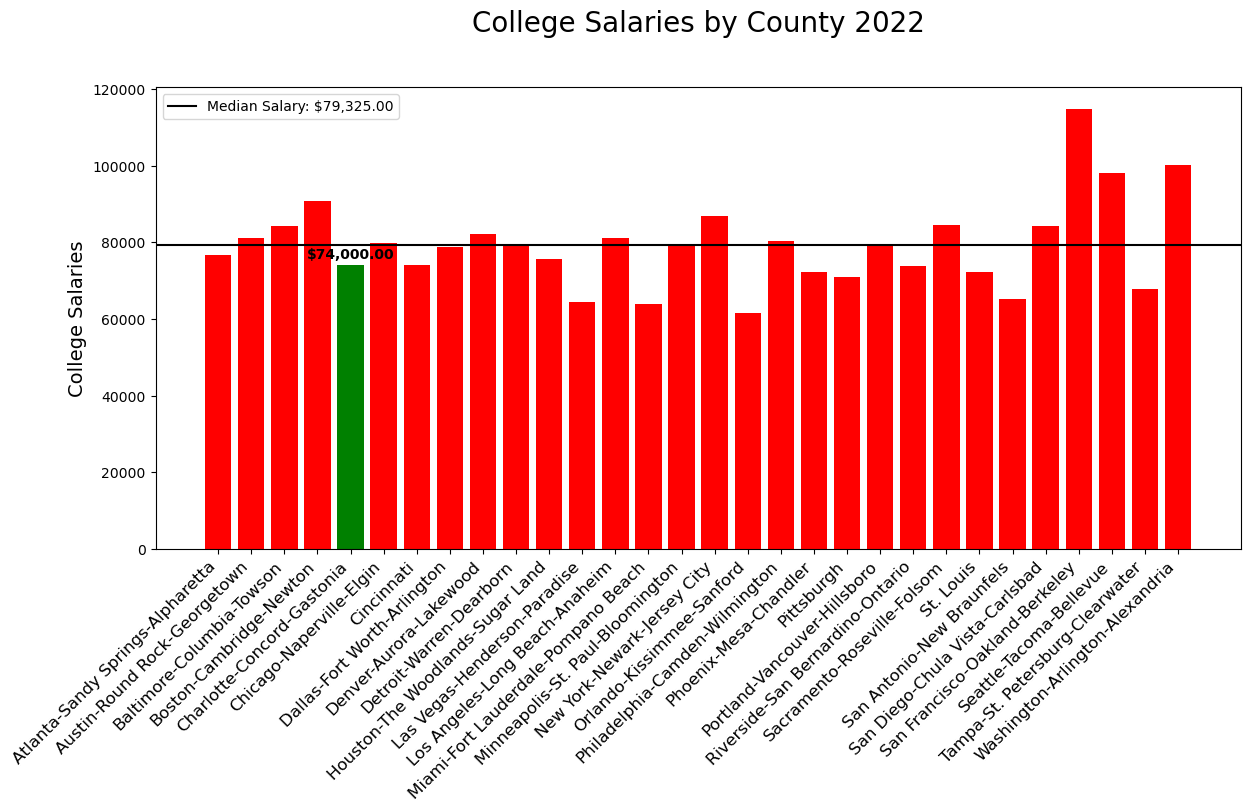

In [269]:
# Plot a bar chart of 2022 data for Charlotte compared to other counties in regards to how bachelors degree salaries compare.

def clean_label(label):
    cleaned_label = label.split(',')[0]
    return cleaned_label.strip()

df.index = df.index.map(clean_label)

counties = df.index[1:-3]
college_salaries = df['Bachelor\'s Degree or Higher '].values[1:-3]

colors = ["red" if county != 'Charlotte-Concord-Gastonia' else 'green' for county in counties]

plt.figure(figsize=(14, 6))
bars = plt.bar(counties, college_salaries, color= colors)
plt.xticks(fontsize = 12, rotation = 45, ha="right")

median_salary = np.median(college_salaries)

# Display Charlotte Salary: 
for bar, salary in zip(bars, college_salaries):
    if salary == 74000.0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'${salary:,.2f}', ha='center', va='bottom', fontsize=10, weight = 'bold')


plt.axhline(y=median_salary, color = "black", linestyle = '-', label = f'Median Salary: ${median_salary:,.2f}')
plt.ylabel('College Salaries', fontsize = 14)
plt.legend()
plt.ylabel('College Salaries')
plt.title('College Salaries by County 2022', fontsize = 20, pad = 40)


plt.show()

# This was interesting, but unfortunately does not help my argument. RIP my time.

{'whiskers': [<matplotlib.lines.Line2D at 0x1578543d0>,
 'caps': [<matplotlib.lines.Line2D at 0x157855ab0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x15780a9e0>],
 'medians': [<matplotlib.lines.Line2D at 0x157854670>],
 'fliers': [<matplotlib.lines.Line2D at 0x157854b50>],
 'means': []}

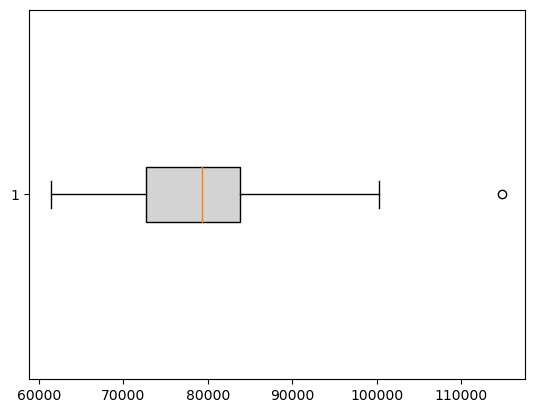

In [249]:
plt.boxplot(college_salaries, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))


In [14]:
type(data_df)

pandas.core.series.Series

In [58]:
!git clone https://github.com/EddietheProgrammer/DTSC-1302-Individual-Mastery.git

Cloning into 'DTSC-1302-Individual-Mastery'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 339.28 KiB | 2.67 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [62]:
!git add Final-Project-Visuals

fatal: pathspec 'Final-Project-Visuals' did not match any files
